# Data Mining Versuch Fahrzeugdaten

* Autor: Prof. Dr. Johannes Maucher
* Datum: 11.03.2021

**Abzugeben ist das Jupyter Notebook mit dem verlangten Implementierungen, den entsprechenden Ausgaben, Antworten und Diskussionen/Beschreibungen. Das Notebook ist als .ipynb und als .html abzugeben.**

* [Übersicht Jupyter Notebooks im Data Mining Praktikum](http://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)


# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Datenimport und Datenexport von und zu 
    * Pandas Dataframes
    * PostgreSQL Datenbanken
* Explorative Datenanalysen (EDA)
* Datenvisualisierung mit Matplotlib und plotly
* Überwachtes Lernen eines Klassifikationsmodells
* Überwachtes Lernen eines Regressionsmodells
* Evaluation von Klassifikationsmodellen
* Evaluation von Regressionsmodellen
* Kreuzvalidierung
* Hyperparameteroptimierung

## Vorbereitung

### Datenbankzugriff
1. Installieren Sie PostgreSQL. Mit PostgreSQL sollte auch pgAdmin installiert werden. PgAdmin ist eine open-source Software für die Entwicklung und die Administration von PostgreSQL Datenbanken.
2. Legen Sie über pgAdmin eine Datenbank für das Datamining-Praktikum an. In diese Datenbank werden alle in diesem Versuch relevanten Tabellen geschrieben.
3. Für den Datenbankzugriff aus Python heraus wird in diesem Versuch [SQLAlchemy](http://docs.sqlalchemy.org/en/latest/intro.html) eingesetzt. Machen Sie sich mit den Basics von SQLAlchemy vertraut, z.B. mithilfe von [https://gitlab.mi.hdm-stuttgart.de/maucher/DataScienceProgramming/blob/master/Python/Lecture/07DataBasePandas.ipynb](https://gitlab.mi.hdm-stuttgart.de/maucher/DataScienceProgramming/blob/master/Python/Lecture/07DataBasePandas.ipynb), Abschnitt *Using SQLAlchemy and Pandas*.

### Pandas Dataframe
Machen Sie sich mit den Grundlagen von Pandas vertraut.


### Machine Learning
Machen Sie sich mit Entscheidungsbäumen, Random Forest, Single Layer Perzeptron und Multi Layer Perzeptron vertraut. 

# Durchführung

## Einlesen der Daten aus .csv und Ablage in PostgreSQL
In diesem ersten Teil des Versuchs sollen die relevanten Daten aus dem .csv-File eingelesen und in einer PostgreSQL-Tabelle abgelegt werden. Das benötigte File `Fahrzeuginformationen.csv` liegt im aktuellen Verzeichnis.

1. Laden Sie die .csv-Datei in einen Pandas Dataframe. 

2. Zeigen Sie für den angelegten Dataframe 
    * die ersten 10 Zeilen
    * die Größe (Anzahl Zeilen und Anzahl Spalten)
    * die Anzahl der NaNs pro Spalte
    an. 
3. Zeigen Sie mit der Pandas-Dataframe Methode `info()`, den Datentyp aller Spalten an. Der Typ der Spalte `CO2-Emissionen` ist tatsächlich kein numerischer Typ. Finden Sie heraus warum das so ist. Beheben Sie den *Fehler* und sorgen Sie dafür, dass auch diese Spalte einen numerischen Typ hat.

4. Schreiben Sie den im vorigen Schritt angepassten Dataframe mit der Pandas Methode `to_sql()` in eine Datenbanktabelle mit dem Namen `vehicledata`.

### Read .csv file into Pandas Dataframe

In [1]:
import pandas as pd

# decimal solves point 3
carsDF = pd.read_csv("/home/jovyan/work/uebung-1/Fahrzeuginformationen.csv",sep=",",header=0,index_col=False,decimal=",")

### Show first 10 rows of Dataframe

In [ ]:
carsDF.head(10)

### Show shape of Dataframe

In [ ]:
rows, cols = carsDF.shape
print(f"Rows: {rows}, Cols: {cols}")

### Show number of NaNs per column

In [ ]:
carsDF.isnull().sum()

### Show data types of columns

In [ ]:
carsDF.info()

### Debugging to find out why column CO2-Emissionen is not numeric

In [ ]:
# errors when not using decimal parameter in read_csv
try:
  pd.to_numeric(carsDF["CO2-Emissionen"])
except ValueError as e:
  print(e)

### Write to DB

In [ ]:
from sqlalchemy import create_engine, inspect
import json

with open('/home/jovyan/work/db.json') as f:
    conf = json.load(f)

engine = create_engine(f"postgresql+psycopg2://{conf['user']}:{conf['password']}@{conf['host']}/{conf['dbname']}")

inspector = inspect(engine)

if not inspector.has_table("vehicledata"):
    carsDF.to_sql(name='vehicledata',index=True, index_label='index',con=engine)
else:
    print("table already exists")

## Exemplarische Datenbankabfragen

1. Verwenden Sie Pandas Dataframe Methode `read_sql_query()` um 3 für Sie interessante Datenbankabfragen zu implementieren. Die Resultate der Abfragen werden in einen Pandas Dataframe geschrieben. Zeigen Sie diese an. 

## Data Exploration
1. Zeigen Sie für alle Spalten die Anzahl der unterschiedlichen Werte in dieser Spalte an.
2. Benutzen Sie die Pandas Dataframe Methode `describe()` um sämtliche deskriptiven Statistiken anzuzeigen.
3. Legen Sie eine Liste `numeric_features` an, welche nur die Spaltennamen der numerischen Spalten enthält.
4. Schreiben Sie die Namen aller nicht-numerischen Spalten in eine Liste `categoric_features`.
5. Visualisieren Sie für die Spalten `HST_Benennung`, `Neupreis Brutto`, `CO2-Emissionen` und `Produktgruppe` die Verteilung der Werte in einem Barplot bzw. Histogramm.

### Show Columns

In [ ]:
for col in carsDF:
  uniques = carsDF[col].value_counts().count()
  print(f"{col}: {uniques}")

### Description

In [ ]:
carsDF.describe()

### Divide into categorical and numerical features

In [2]:
import numpy as np

numeric_features = carsDF.select_dtypes(include=np.number).columns
categoric_features = carsDF.select_dtypes(exclude=np.number).columns

### Distribution of categorical features

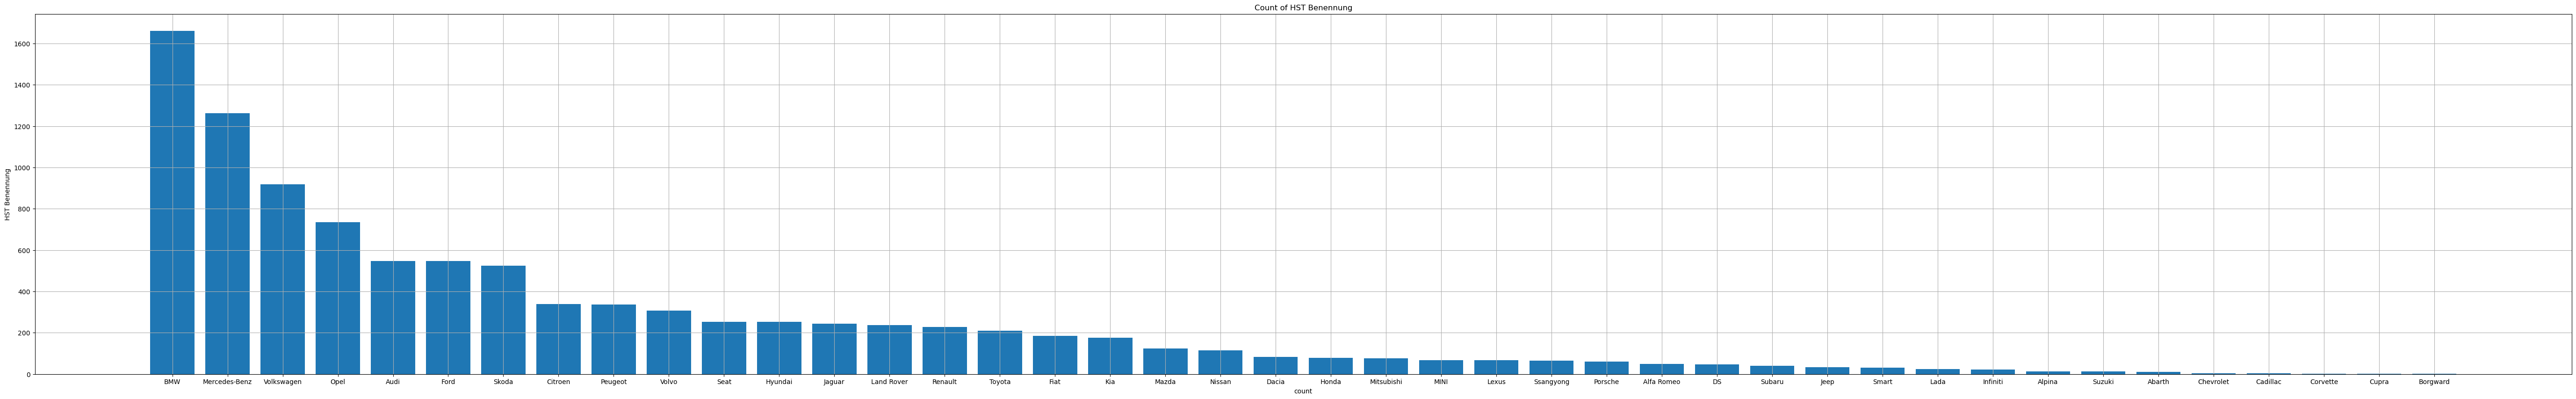

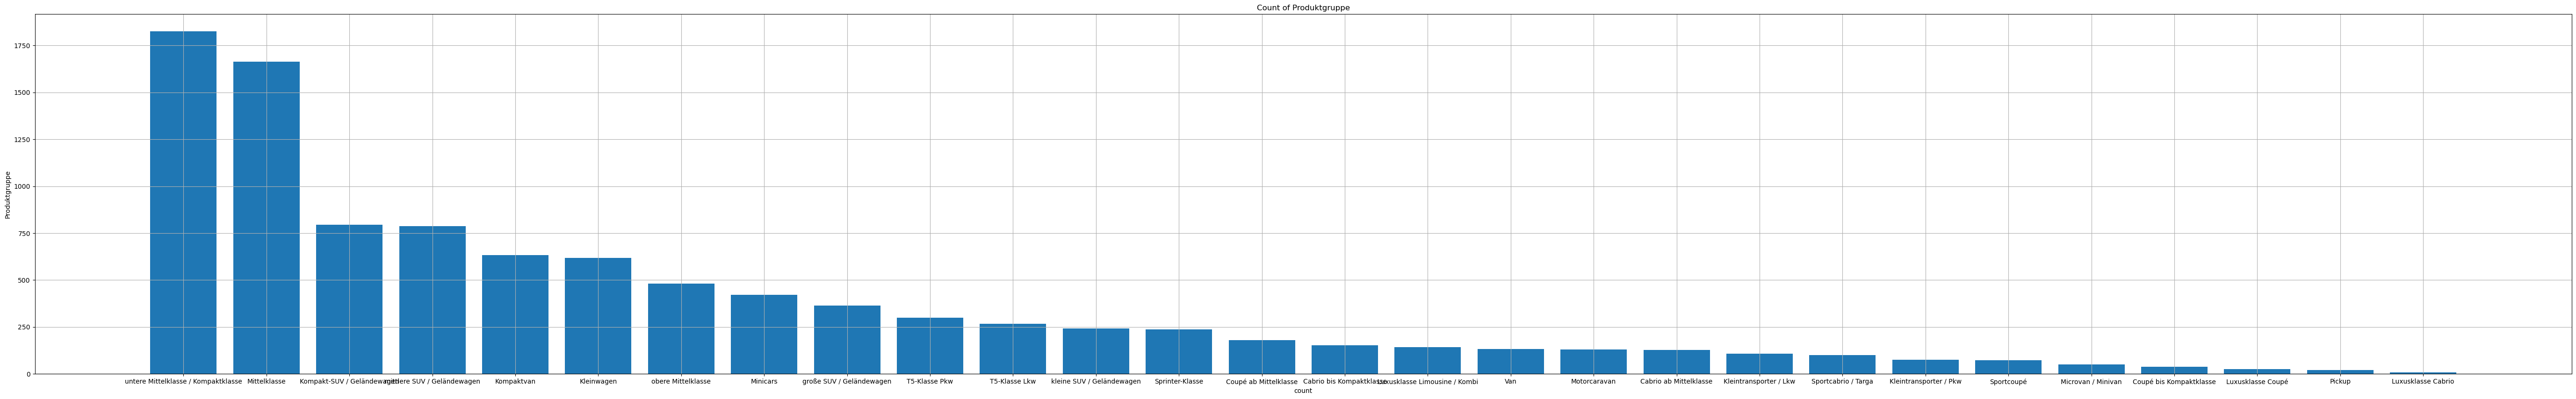

In [21]:
import matplotlib.pyplot as plt

def plot_text_based(col):
  counted = carsDF[col].value_counts()

  plt.figure(figsize=(70,10))
  plt.grid(True)
  plt.xlabel("count")
  plt.ylabel(col)
  plt.title(f"Count of {col}")
  plt.bar(counted.index, counted.values)
  plt.show()

plot_text_based("HST Benennung")
plot_text_based("Produktgruppe")


### Distribution of numerical features

In [ ]:
def plot_numeric(col):
  plt.figure(figsize=(20,10))
  plt.grid(True)
  plt.ylabel(col)
  plt.hist(carsDF[col], 30)
  plt.show()

plot_numeric("CO2-Emissionen")
plot_numeric("Neupreis Brutto")

## Machine Learning 1: Produktgruppenbestimmung

In diesem Abschnitt soll ein Klassifikator trainiert werden, welcher anhand von Eingabemerkmalen, wie *Breite*, *Höhe*, *Gewicht* usw. das zugehörige Fahrzeugsegment (`Produktgruppe`) vorhersagt.

In diesem Teilversuch sollen als Eingabemerkmale die zuvor in `numeric_features` definierten Spalten und die nicht-numerischen Spalten `Antrieb`, `Kraftstoffart`, `KSTA Motor` verwendet werden. Die Zielvariable (Ausgabe) stellt die Spalte `Produktgruppe` dar.


### Produktgrunppenspezifische Visualisierung

1. Plotten Sie für die drei oben angegebenen nicht-numerischen Merkmale jeweils eine Produktgruppen-spezifische Häufigkeitsverteilung in der unten dargestellten Form. 

<img src="https://maucher.home.hdm-stuttgart.de/Pics/antrieb_produktgruppe.png" style="width:500px" align="center">

2. Plotten Sie für alle numerischen Merkmale jeweils einen Produktgruppen-spezifischen Boxplot in der unten dargestellten Form. 

<img src="https://maucher.home.hdm-stuttgart.de/Pics/neupreis_produktgruppe.png" style="width:500px" align="center">

3. Erzeugen Sie mit [plotly.express scatter()](https://plotly.com/python/line-and-scatter/) einen 2-dimensionalen Plot, in dem alle Fahrzeuge wie folgt dargestellt werden (pro Fahrzeug ein Marker):
- x-Achse: `Länge`
- y-Achse: `Höhe`
- Farbe des Markers: `Produktgruppe`
- Größe des Markers: `Leergewicht`
- Bei *Mouse-Over* soll für den jeweiligen Marker der entsprechende Wert von `Neupreis Brutto` und `HST-HT Benennung` angezeigt werden. 

### Lösung

#### 1. Produktgruppen-spezifische Visualisierung


In [ ]:
for col in ['Antrieb', 'Kraftstoffart', 'KSTA Motor']:
  crossed = pd.crosstab(carsDF['Produktgruppe'], carsDF[col])
  crossed.plot(kind='barh', stacked=True, figsize=(20,10), title=f"{col} nach Produktgruppe")

#### Plotly Helpers

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)

import plotly.io as pio
pio.renderers.default='notebook'

#### 2. Produktgruppen-spezifischer Boxplot

In [ ]:
for col in numeric_features:
  fig = px.box(carsDF, x=col, y='Produktgruppe', orientation='h')
  fig.show("notebook")

#### 3. Scatter Plot

In [ ]:
fig = px.scatter(carsDF, x="Länge", y="Höhe", color="Produktgruppe", size="Leergewicht", hover_data=['Neupreis Brutto', 'HST-HT Benennung'])
fig.show("notebook")

### Data Encoding

1. Categoriale Merkmale ohne Ordnungsrelation (=nominale Merkmale) müssen One-Hot-Encodiert werden. Führen Sie für die drei categorialen Merkmale ein One-Hot-Encoding mit dem [scikit-learn LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) durch.
2. Fügen Sie die one-hot-encodierten Spalten mit den numerischen Spalten zusammen. Weisen Sie die entsprechende Eingabedatenmatrix einem 2-dimensionalen numpy-array `X` zu. 
3. Führen Sie auf die Zielvariable `Produktgruppe` ein Label-Encoding mit [scikit-learn LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) aus. Weisen Sie diese Daten dem 1-dimensionalen numpy-array `y` zu.

##### One-Hot-Encoding

In [18]:
from sklearn import preprocessing

categoric_features = ['Antrieb', 'Kraftstoffart', 'KSTA Motor']

# keep binarizer instances for later use
binarizers = [(col, preprocessing.LabelBinarizer()) for col in categoric_features]
encoded = [lb.fit_transform(carsDF[col]) for col, lb in binarizers]

##### Merging

In [19]:
X = np.concatenate([carsDF[numeric_features].to_numpy(), *encoded], axis=1)

##### Label-Encoding

In [20]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(carsDF['Produktgruppe'])

### Generate Training- and Testpartition
Benutzen Sie die [scikit-learn Methode train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) um `X` und `y` in einer Trainings- und Testpartition aufzuteilen. 30% der Daten soll für das Testen, 70% für das Training benutzt werden.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Decision Tree Training, Test and Evaluation
1. Trainieren Sie einen [Entscheidungsbaum](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) mit den Trainingsdaten.
2. Wenden Sie den gelernten Entscheidungsbaum auf die Testdaten.
3. Evaluieren Sie die Qualität des Entscheidungsbaumes indem Sie 
     - einen [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) erzeugen. 
     - die [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) plotten.
 
 Interpretieren Sie das Ergebnis.
 
4. Führen Sie eine [10-fache Kreuzvalidierung](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) des Entscheidungsbaumes mit den Daten `X` und `y` aus. Interpretieren Sie das Ergebnis.
5. Bestimmen Sie die *Wichtigkeit* der Eingabemerkmale für die Klassifikationsaufgabe, indem Sie auf den in 1.) gelernten DecisionTree das Attribut `feature_importance_` abfragen. Stellen Sie die Werte in einem Barplot dar.

#### Decision Tree Training

In [80]:
from sklearn.tree import DecisionTreeClassifier

def train_and_score(clf):
  clf.fit(X_train, y_train)
  print(f"Test score: {clf.score(X_test, y_test)}")
  return clf

dtc = train_and_score(DecisionTreeClassifier())


Test score: 0.8315194930431189


#### Application on Test Data

In [41]:
predictions = dtc.predict(X_test)

#### Classification Report

In [83]:
from sklearn.metrics import classification_report

def print_report(predictions):
  print(classification_report(y_test, predictions, target_names=le.classes_))

print_report(predictions)

                                     precision    recall  f1-score   support

             Cabrio ab Mittelklasse       0.82      0.97      0.89        73
           Cabrio bis Kompaktklasse       0.96      0.94      0.95        95
              Coupé ab Mittelklasse       0.94      0.88      0.91       130
            Coupé bis Kompaktklasse       1.00      0.86      0.93        29
             Kleintransporter / Lkw       1.00      0.98      0.99        83
             Kleintransporter / Pkw       0.89      0.61      0.72        56
                         Kleinwagen       0.93      0.93      0.93       453
         Kompakt-SUV / Geländewagen       0.88      0.83      0.86       580
                         Kompaktvan       0.83      0.86      0.85       473
                 Luxusklasse Cabrio       1.00      0.50      0.67        10
                  Luxusklasse Coupé       0.72      0.93      0.81        14
      Luxusklasse Limousine / Kombi       0.95      0.98      0.97       10

#### Confusion Matrix

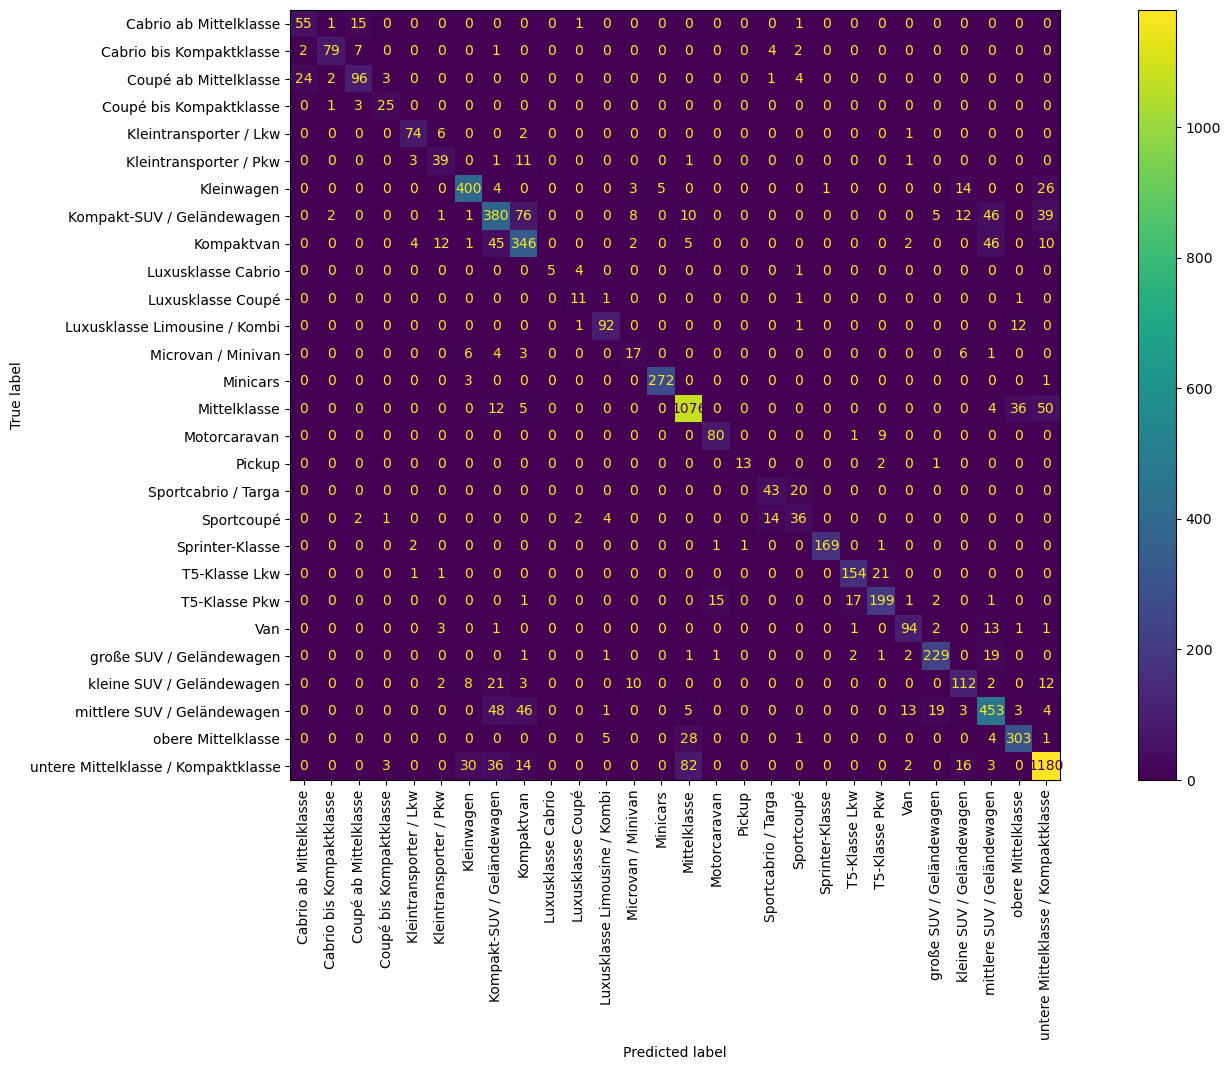

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(predictions):
  fig, ax = plt.subplots(figsize=(20,10))
  ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions, display_labels=le.classes_, ax=ax, xticks_rotation='vertical')
  plt.show()

plot_confusion_matrix(predictions)


#### Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score

def cross_validate(clf):
  scores = cross_val_score(clf, X, y, cv=10)
  print(f"Accuracy: {scores.mean():.2f}\nStandard Deviation: {scores.std():.2f}")

cross_validate(dtc)

Accuracy: 0.72
Standard Deviation: 0.03


#### Feature Importance

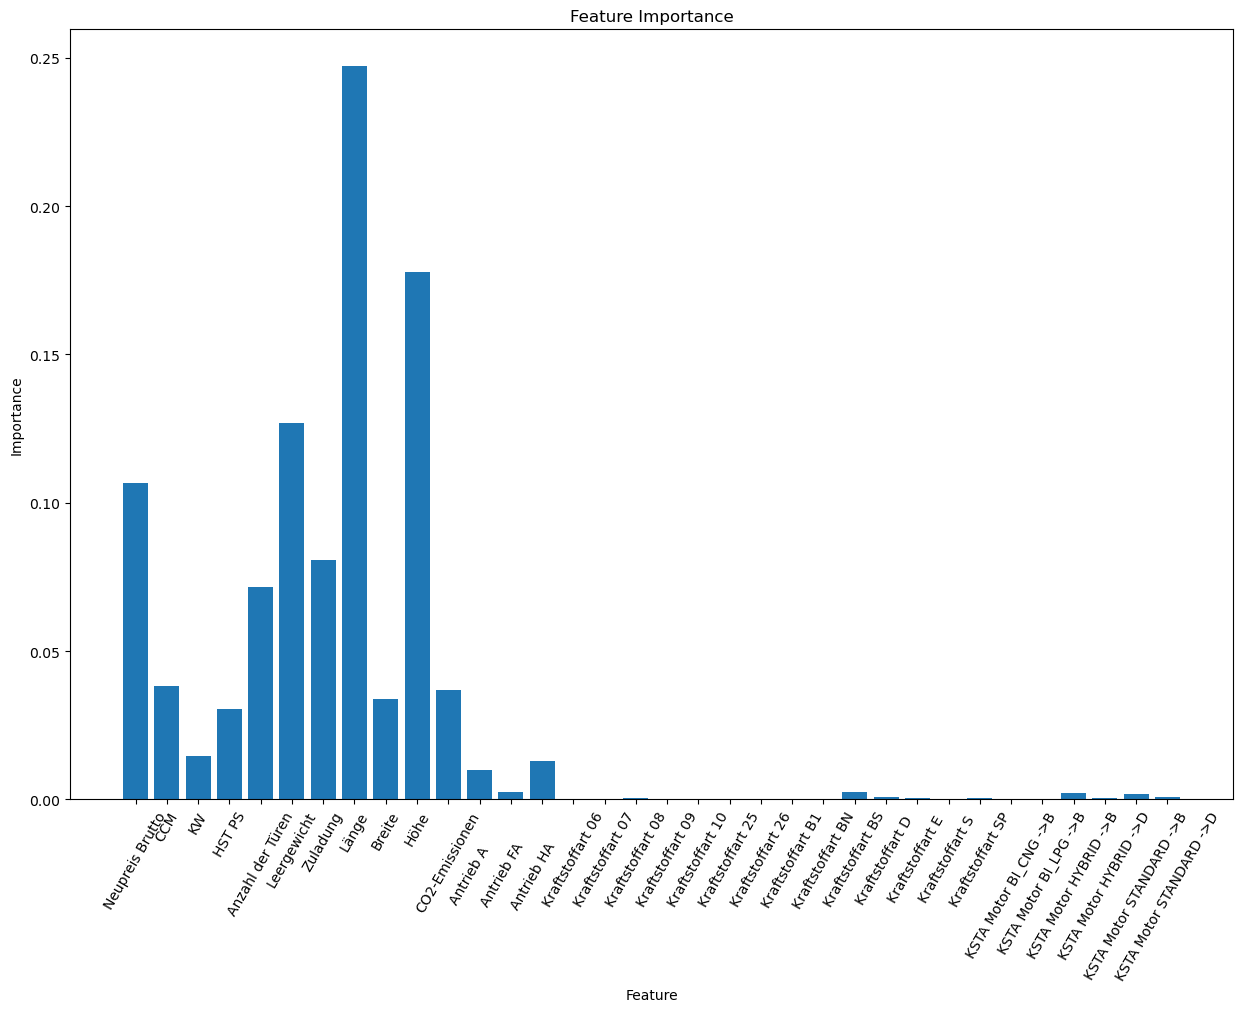

In [78]:
def plot_feature_importances(clf):
  # get inverse mapping from binarizers for all categoric features
  cat_labels = [f"{col} {klass}" for col, lb in binarizers for klass in lb.classes_]

  plt.figure(figsize=(15,10))
  plt.xlabel("Feature")
  plt.xticks(rotation=60)
  plt.ylabel("Importance")
  plt.title("Feature Importance")
  plt.bar([*numeric_features, *cat_labels], clf.feature_importances_)
  plt.show()

plot_feature_importances(dtc)

### Random Forest Training, Test and Evaluation
Wiederholen Sie die Teilaufgaben 1. bis 5. des Entscheidungsbaums für einen [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Vergelichen Sie die Performance der beiden Verfahren.

#### Random Forest Training

In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc = train_and_score(RandomForestClassifier())

Test score: 0.921476787436286


#### Application on Test Data

In [82]:
predictions = rfc.predict(X_test)

#### Classification Report

In [84]:
print_report(predictions)

                                     precision    recall  f1-score   support

             Cabrio ab Mittelklasse       0.82      0.97      0.89        73
           Cabrio bis Kompaktklasse       0.96      0.94      0.95        95
              Coupé ab Mittelklasse       0.94      0.88      0.91       130
            Coupé bis Kompaktklasse       1.00      0.86      0.93        29
             Kleintransporter / Lkw       1.00      0.98      0.99        83
             Kleintransporter / Pkw       0.89      0.61      0.72        56
                         Kleinwagen       0.93      0.93      0.93       453
         Kompakt-SUV / Geländewagen       0.88      0.83      0.86       580
                         Kompaktvan       0.83      0.86      0.85       473
                 Luxusklasse Cabrio       1.00      0.50      0.67        10
                  Luxusklasse Coupé       0.72      0.93      0.81        14
      Luxusklasse Limousine / Kombi       0.95      0.98      0.97       10

#### Confusion Matrix

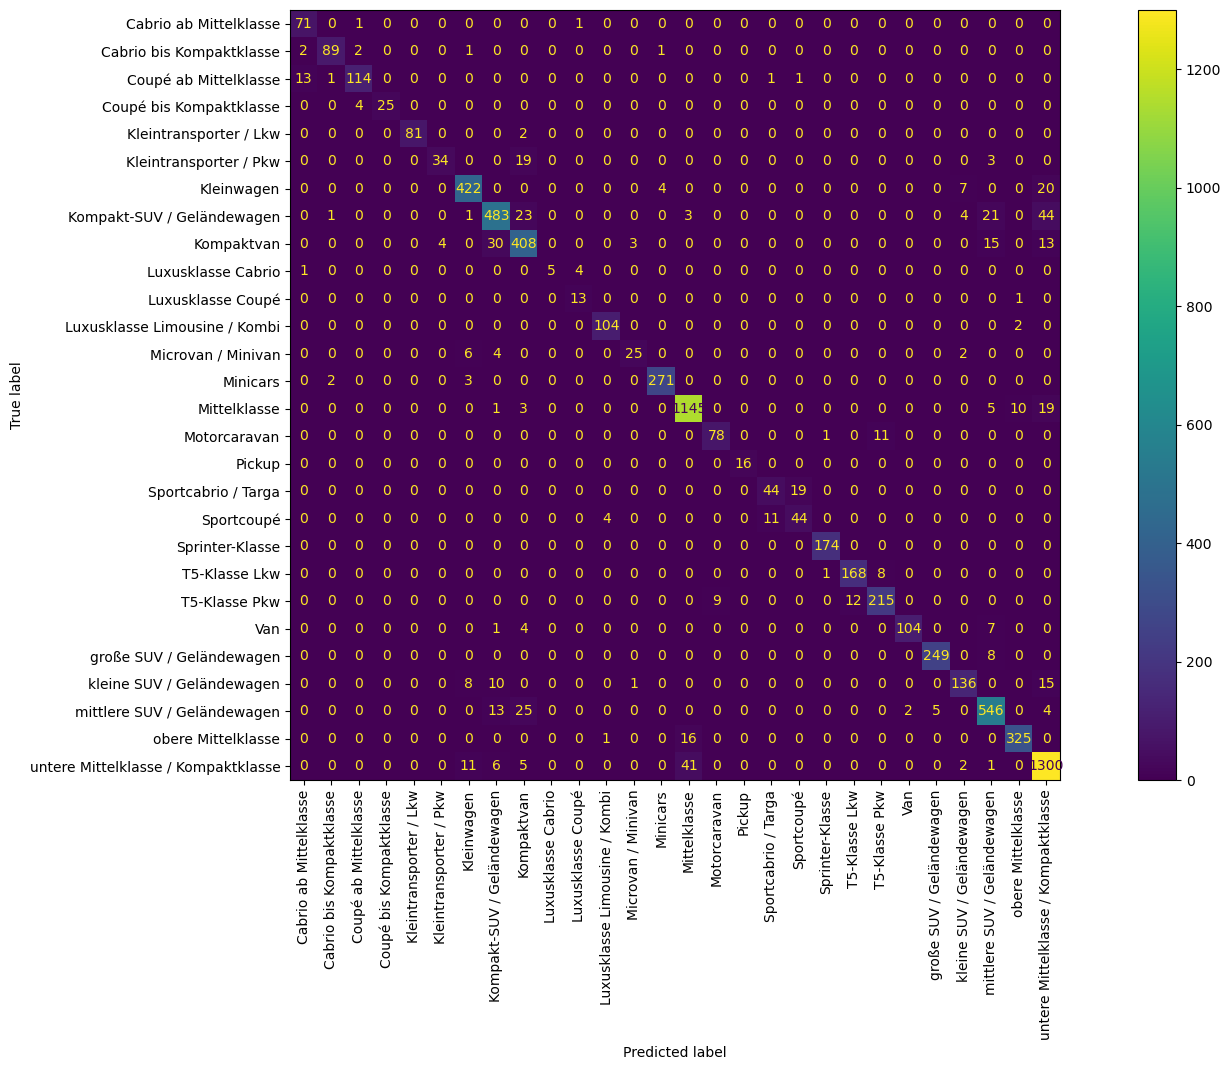

In [85]:
plot_confusion_matrix(predictions)

#### Cross Validation

In [86]:
cross_validate(rfc)

#### Feature Importance

In [ ]:
plot_feature_importances(rfc)

## Machine Learning 2: Schätzung der CO2-Emission
In diesem Teilversuch soll aus den Eingabemerkmalen 

`"CCM","HST PS", "Anzahl der Türen", "Leergewicht", "Zuladung", "Länge", "Breite", "Höhe"`

die Zielvariable 

`CO2-Emissionen`

geschätzt werden. Hierzu soll ein möglichst gutes Regressionsmodell trainiert werden.

### Visuelle Korrelationsanalyse
1. Stellen Sie für jedes der 8 Eingabemerkmale die Korrelation mit der Zielvariablen visuell in einem Scatterplot dar, in dem das jeweilige Eingabemerkmal auf der x-Achse und die Zielvariable auf der y-Achse aufgetragen wird.
2. Diskutieren Sie die Korrelationen. Welche Merkmale korrelieren am stärksten mit der Zielvariable? Erscheint Ihnen das plausibel?

### Data Encoding
1. Weisen Sie die Matrix der Eingabedaten dem 2-dimensionalen Array `X` und die Zielvariable dem 1-dimensionalen Array `y` zu.
2. Führen Sie auf `X` und `y` eine Partitionierung in Trainings- und Testdaten durch, wieder im Verhältnis 70/30.
3. Skalieren Sie die Eingabevariablen und die Zielvariable mit dem [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Die Skalierung muss sowohl auf Trainings- als auch auf Testdaten ausgeführt werden. Warum darf die Skalierung erst nach dem Split in die beiden Partitionen ausgeführt werden? Worauf ist zu achten? 

### Training, Test und Evaluation verschiedener Regressionsmodelle

Führen Sie die folgenden Teilaufgaben sowohl für ein [Single Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) als auch für ein [Multi Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) mit 20 Neuronen in der Hidden-Schicht durch. Vergleichen Sie am Ende die Performance der beiden Verfahren.
1. Trainieren Sie den Algorithmus mit den Trainingsdaten.
2. Wenden Sie das gelernte Modell auf die Testdaten an.
3. Evaluieren Sie die Qualität der Modelle, indem Sie auf die vorhergesagten Ausgaben und die wahren Ausgaben die unten gegebene Funktion aufrufen.
4. Beschreiben Sie kurz die in der Funktion verwendeten Metriken

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [ ]:
def determineRegressionMetrics(y_test,y_pred,title=""):
    mse = mean_squared_error(y_test, y_pred)
    mad = mean_absolute_error(y_test, y_pred)
    rmsle=np.sqrt(mean_squared_error(np.log(y_test+1),np.log(y_pred+1)))# +1 for avoiding log(0) 
    r2=r2_score(y_test, y_pred)
    med=median_absolute_error(y_test, y_pred)
    print(title)
    print("Mean absolute error =", round(mad, 2))
    print("Mean squared error =", round(mse, 2))
    print("Median absolute error =", round(med, 2))
    print("R2 score =", round(r2, 2))
    print("Root Mean Squared Logarithmic Error =",rmsle)

### Hyperparameteroptimierung

Für ein [Multi Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) soll eine Hyperparameteroptimierung durchgeführt werden. Ziel ist es innerhalb der unten vorgegebenen Wertebereiche für die Hyperparameter `hidden_layer_sizes`, `activation` und `learning_rate` die beste Konfiguration zu finden. Hierzu kann entweder [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) oder [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) eingesetzt werden. GridSearchCV testet einfach alle Konfigurationen durch, benötigt daher aber viel Zeit. RandomizedSearchCV geht heuristisch und damit schneller durch den Suchraum. Wenden Sie eines dieser beiden Verfahren an, um für das unten gegebene Parameter-Grid die optimale Konfiguration zu finden. Welches ist die optimale Konfiguration und zu welchem `neg_mean_absolute_error`  führt diese?

In [ ]:
param_grid = [{'hidden_layer_sizes': [(10,),(20,),(30,),(40,),(50,),(100,),(10,10)], 
               'activation': ["logistic", "tanh", "relu"], 
               'learning_rate': ["constant", "invscaling", "adaptive"]}]
param_grid